Importing the dependencies

In [1]:
import tensorflow as tf
import PIL as ImageSS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

IMPORT ALL THE FILES FROM YOUR GOOGLE DRIVE(The link to the files is already provided in the linked-in post)

In [2]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')
import os
os.environ['env1'] = "/content/gdrive/My Drive/kaggle/hand_number"

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


The directory in which the dataset is stored on the google drive

In [3]:
cd drive/MyDrive/kaggle/hand_number

/content/drive/MyDrive/kaggle/hand_number


IMPORTING THE DATASET


In [4]:
traini=pd.read_csv('train_images.csv')
testi=pd.read_csv('test_images.csv')
trainl=pd.read_csv('train_labels.csv')
testl=pd.read_csv('test_labels.csv')

In [6]:
train_images=np.array(traini)
test_images=np.array(testi)
train_labels=np.array(trainl)
test_labels=np.array(testl)

In [7]:
train_labels.shape

(17999, 1)

DISPLAYING 3 RANDOM IMAGES ALONG WITH THEIR LABELS

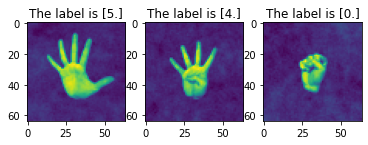

In [8]:
#displaying some random images with label
a=np.random.randint(100,200)
fig, ax=plt.subplots(1,3)
for i, (ax) in enumerate(fig.axes):
  ax.imshow(train_images[i+a,:].reshape(64,64))
  ax.set_title("The label is {}".format(train_labels[i+a]))

#plt.imshow(train_images[1,:].reshape(64,64))

THE MODEL ITSELF

In [9]:
#model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPool2D, Flatten, Conv2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

model=Sequential([
                  Conv2D(128, (3,3), padding='SAME', activation='relu', input_shape=(64,64,1)),
                  MaxPool2D(),
                  Conv2D(128, (3,3), padding='SAME', activation='relu'),
                  MaxPool2D(),
                  Dropout(0.3),
                  Conv2D(64, (3,3), padding='SAME', activation='relu'),
                  MaxPool2D(),
                  Flatten(),
                  Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                  Dropout(0.3),
                  Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                  Dropout(0.1),
                  Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                  Dropout(0.1),
                  Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                  Dense(6, activation='softmax')

])

In [10]:
train_images=train_images.reshape(len(train_images),64,64)
test_images=test_images.reshape(len(test_images),64,64)

In [11]:
print(train_images.shape)
print(train_labels.shape)

(17999, 64, 64)
(17999, 1)


USING DATA AUGMENTATION, horizontal flipping is not used since the right and left hand images are already present in the dataset

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dg=ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1)
dg.fit(train_images[...,np.newaxis])

In [13]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics='sparse_categorical_accuracy')

Training the model--


In [15]:
his=model.fit(dg.flow(train_images[...,np.newaxis], train_labels, batch_size=128),
         validation_data=dg.flow(train_images[...,np.newaxis], train_labels,batch_size=10),
         steps_per_epoch=len(train_images[...,np.newaxis]) / 128, epochs=10)

Epoch 1/10
140/140 [==============================] - 25s 181ms/step - loss: 4.3174 - sparse_categorical_accuracy: 0.6145 - val_loss: 1.1021 - val_sparse_categorical_accuracy: 0.9553
Epoch 2/10
140/140 [==============================] - 25s 175ms/step - loss: 0.8778 - sparse_categorical_accuracy: 0.9178 - val_loss: 0.6057 - val_sparse_categorical_accuracy: 0.9468
Epoch 3/10
140/140 [==============================] - 25s 175ms/step - loss: 0.4962 - sparse_categorical_accuracy: 0.9555 - val_loss: 0.3222 - val_sparse_categorical_accuracy: 0.9880
Epoch 4/10
140/140 [==============================] - 25s 175ms/step - loss: 0.3639 - sparse_categorical_accuracy: 0.9606 - val_loss: 0.2384 - val_sparse_categorical_accuracy: 0.9901
Epoch 5/10
140/140 [==============================] - 24s 174ms/step - loss: 0.2793 - sparse_categorical_accuracy: 0.9696 - val_loss: 0.1814 - val_sparse_categorical_accuracy: 0.9950
Epoch 6/10
140/140 [==============================] - 25s 175ms/step - loss: 0.2334 -

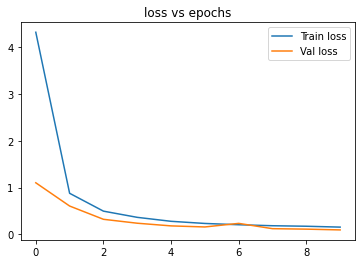

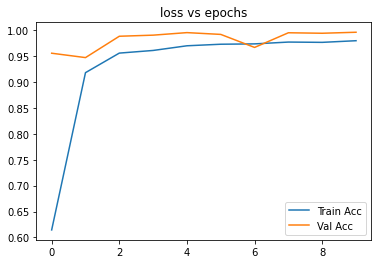

In [16]:
  fig, ax = plt.subplots()
hist=pd.DataFrame(his.history)
hist.plot(y=["loss", "val_loss"], title="loss vs epochs", ax=ax)
ax.legend(["Train loss", "Val loss"])

fig, ax = plt.subplots()
hist=pd.DataFrame(his.history)
hist.plot(y=["sparse_categorical_accuracy", "val_sparse_categorical_accuracy"], title="loss vs epochs", ax=ax)
ax.legend(["Train Acc", "Val Acc"])

I used the saved weights, If running for the first time, you will have to train the model first

In [ ]:
#model.save_weights('/content/drive/MyDrive/kaggle/hand_number/checkpoints/hand_checkpoint')

In [17]:
#model.load_weights('/content/drive/MyDrive/kaggle/hand_number/checkpoints/hand_checkpoint')

In [18]:
test_loss, test_acc= model.evaluate(test_images[...,np.newaxis], test_labels)

113/113 [==============================] - 1s 8ms/step - loss: 0.0776 - sparse_categorical_accuracy: 1.0000


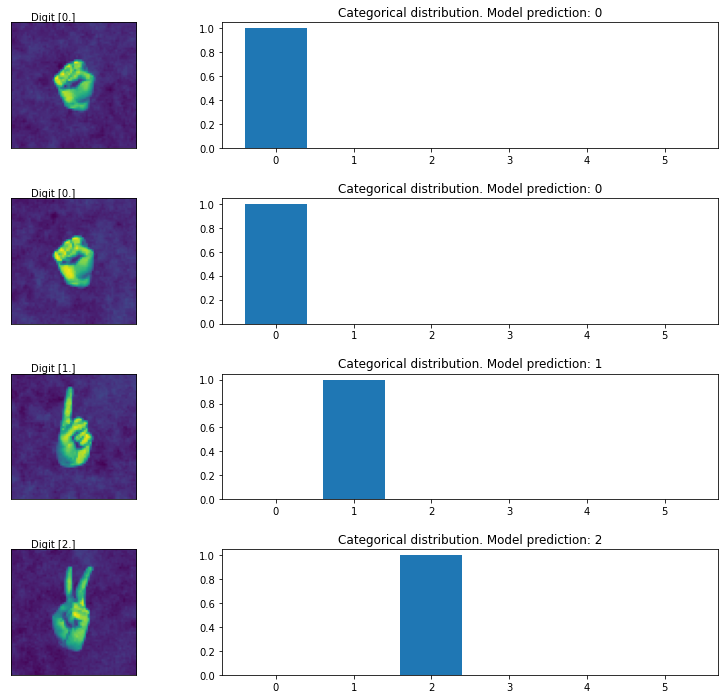

In [19]:
random_inx = np.random.choice(len(test_images), 4)
random_test_images = train_images[random_inx, ...]
random_test_labels = train_labels[random_inx, ...]

predictions = model.predict(random_test_images[...,np.newaxis])
fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow((np.squeeze(image)))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()

FOR LIVE VIDEO FEED --

In [20]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [21]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img


In [27]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

RUN THIS CELL TO TEST THE REAL-TIME DIGIT GESTURE RECOGNITION--

In [31]:
from google.colab import output

video_stream()
# label for video
label_html = 'Capturing...'
count = 0 
js_reply = video_frame(label_html, "")
while True:
    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])
    img=img.astype('uint8')
    img=tf.image.resize(img, [64,64], preserve_aspect_ratio=False,antialias=False, name=None)
    img=np.array(img)
    img=img[:,:,0]
    #plt.imshow(img, cmap='gray')
    predictions = model.predict(img[np.newaxis,...,np.newaxis])
    if (predictions.max()>0.95):
      label_html=(f"Model prediction: {np.argmax(predictions)}")
    js_reply = video_frame(label_html, "")
    if not js_reply:
        break

<IPython.core.display.Javascript object>



---
Aryan Tyagi,

IIT BHU